# Forecasting Using ARIMA Models in Python

In this notebook, you will learn to use the powerful ARIMA class models to forecast the future. You will learn how to use the statsmodels package to analyze time series, to build tailored models, and to forecast under uncertainty. How will the stock market move in the next 24 hours? How will the levels of CO2 change in the next decade? How many earthquakes will there be next year? You will learn to solve all these problems and more.

## Table of Contents

- [Introduction](#intro)
- [Data Preparation for Modeling](#prep)
- [AR, MA and ARMA Models](#arma)

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

path = "data/dc29/"

---
<a id='intro'></a>

<img src="images/ts3_001.png" alt="" style="width: 800px;"/>

<img src="images/ts3_002.png" alt="" style="width: 800px;"/>

<img src="images/ts3_003.png" alt="" style="width: 800px;"/>

<img src="images/ts3_004.png" alt="" style="width: 800px;"/>

<img src="images/ts3_005.png" alt="" style="width: 800px;"/>

<img src="images/ts3_006.png" alt="" style="width: 800px;"/>

<img src="images/ts3_007.png" alt="" style="width: 800px;"/>

<img src="images/ts3_008.png" alt="" style="width: 800px;"/>


## Exploration

In this exercise you will kick off your journey to become an ARIMA master by loading and plotting a time series.

You will be exploring a dataset of monthly US candy production between 1972 and 2018.

Specifically, you are plotting the industrial production index IPG3113N. This is total amount of sugar and confectionery products produced in the USA per month, as a percentage of the January 2012 production. So 120 would be 120% of the January 2012 industrial production.

Check out how this quantity has changed over time and how it changes throughout the year.

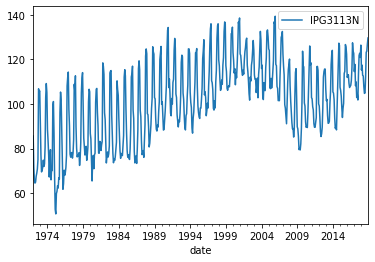

In [3]:
# Import modules
import matplotlib.pyplot as plt
import pandas as pd

# Load in the time series
candy = pd.read_csv(path+'candy_production.csv', 
            index_col='date',
            parse_dates=True)

# Plot and show the time series on axis ax
fig, ax = plt.subplots()
candy.plot(ax=ax)
plt.show();

Can you tell whether this is a stationary time series or not? How does it change throughout the year and across many years?

In [4]:
candy.head()

,IPG3113N
date,
1972-01-01,85.598809
1972-02-01,71.741404
1972-03-01,65.948809
1972-04-01,64.490724
1972-05-01,64.933842


## Train-test splits

In this exercise you are going to take the candy production dataset and split it into a train and a test set. The reason to do this is so that you can test the quality of your model fit when you are done.

Split the time series into train and test sets by slicing with datetime indexes. Take the train set as everything up to the end of 2006 and the test set as everything from the start of 2007.

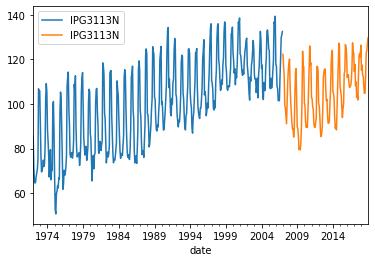

In [5]:
# Split the data into a train and test set
candy_train = candy.loc[:'2006']
candy_test = candy.loc['2007':]

# Create an axis
fig, ax = plt.subplots()

# Plot the train and test sets on the axis ax
candy_train.plot(ax=ax)
candy_test.plot(ax=ax)
plt.show();

Take a look at the plot, do you think that you yourself could predict what happens after 2006 given the blue training set. What happens to the long term trend and the seasonal pattern?

## Is it stationary

Identifying whether a time series is stationary or non-stationary is very important. If it is stationary you can use `ARMA models` to predict the next values of the time series. If it is non-stationary then you cannot use `ARMA models`, however, as you will see in the next lesson, you can often transform non-stationary time series to stationary ones.

In this exercise you will examine some stock and earthquake data sets in order to identify which are ready for ARMA modeling, and which will need further work to make them stationary.

### Question 1

The DataFrame, `df1` is a time series of Amazon stock close price.

Using the console, make a quick plot of this DataFrame using the DataFrame's `.plot()` method and using `plt.show()` to display the plot.

Is `df1`, the stock close price, stationary?

Possible Answers
- No, because df1 has a trend. (correct)
- No, because in df1, the variance changes with time.
- No, in df1, the dynamics change with time.
- Yes, df1 appears to be.

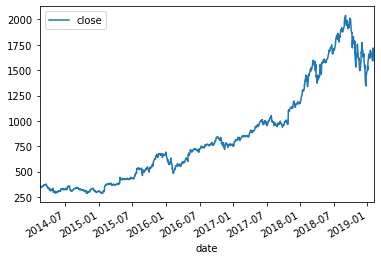

In [8]:
df1 = pd.read_csv(path+'df1.csv', 
            index_col='date',
            parse_dates=True)

# Plot and show the time series on axis ax
fig, ax = plt.subplots()
df1.plot(ax=ax)
plt.show();

### Question2 

The DataFrame, `df2` is a time series of the return (percentage increase of price per day) of Amazon stock.

Make a plot of `df2`. Is `df2`, the stock return, stationary?

Possible Answers
- No, because df2 has a trend.
- No, because in df2, the variance changes with time. (correct)
- No, in df2, the dynamics change with time.
- Yes, df2 appears to be.

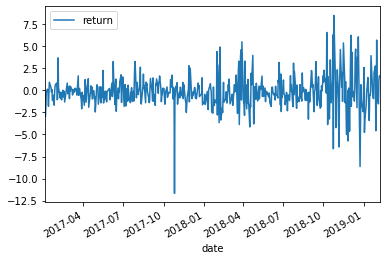

In [9]:
df2 = pd.read_csv(path+'df2.csv', 
            index_col='date',
            parse_dates=True)

# Plot and show the time series on axis ax
fig, ax = plt.subplots()
df2.plot(ax=ax)
plt.show();

### Question 3

The DataFrame, `df3` is a time series showing the number of major earthquakes per year (earthquakes of magnitude 7.0 or greater). Using the console, make a quick plot of this DataFrame.

Make a plot of `df3`. Is `df3`, the number of major earthquakes per year, stationary?

Possible Answers
- No, because df3 has a trend.
- No, because in df3, the variance changes with time.
- No, in df3, the dynamics change with time.
- Yes, df3 appears to be. (correct)

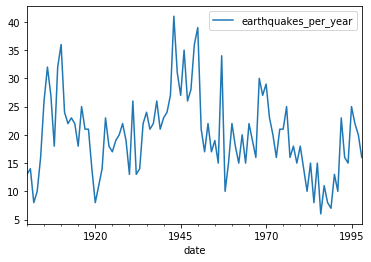

In [10]:
df3 = pd.read_csv(path+'df3.csv', 
            index_col='date',
            parse_dates=True)

# Plot and show the time series on axis ax
fig, ax = plt.subplots()
df3.plot(ax=ax)
plt.show();

You can't see any trend, or any obvious changes in variance, or dynamics. This time series looks stationary.

---
<a id='prep'></a>

## Data Preparation for Modeling

## Making time series stationary

### The augmented Dicky-Fuller test 
Tests for trend non-stationarity, Null hypothesis is time series is non-stationary.

<img src="images/ts3_009.png" alt="" style="width: 800px;"/>

<img src="images/ts3_010.png" alt="" style="width: 800px;"/>

<img src="images/ts3_011.png" alt="" style="width: 800px;"/>

<img src="images/ts3_012.png" alt="" style="width: 800px;"/>


## Augmented Dicky-Fuller

In this exercise you will run the augmented Dicky-Fuller test on the earthquakes time series to `test for stationarity`. You plotted this time series in the last exercise. It looked like it could be stationary, but earthquakes are very damaging. If you want to make predictions about them you better be sure.

Remember that if it were not stationary this would mean that the number of earthquakes per year has a trend and is changing. This would be terrible news if it is trending upwards, as it means more damage. It would also be terrible news if it were trending downwards, it might suggest the core of our planet is changing and this could have lots of knock on effects for us!

The earthquakes DataFrame has been loaded in for you as earthquake.

In [12]:
earthquake = pd.read_csv(path+'earthquakes.csv', 
            index_col='date',
            parse_dates=True)
earthquake.head()

,Year,earthquakes_per_year
date,,
1900-01-01,1900,13.0
1901-01-01,1901,14.0
1902-01-01,1902,8.0
1903-01-01,1903,10.0
1904-01-01,1904,16.0


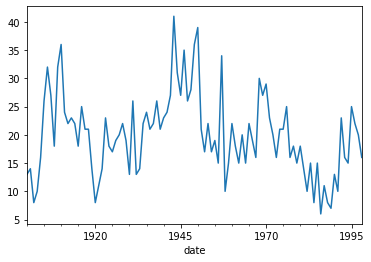

In [18]:
fig, ax = plt.subplots()
earthquake['earthquakes_per_year'].plot(ax=ax)
plt.show();

In [15]:
# Import augmented dicky-fuller test function
from statsmodels.tsa.stattools import adfuller

# Run test
result = adfuller(earthquake['earthquakes_per_year'])

# Print test statistic
print(result[0])

# Print p-value
print(result[1])

# Print critical values
print(result[4]) 

-3.183192251191782
0.02097842525600371
{'1%': -3.5003788874873405, '5%': -2.8921519665075235, '10%': -2.5830997960069446}


`You can reject the null hypothesis that the time series is non-stationary`. Therefore it is stationary. You probably could have intuited this from looking at the graph or by knowing a little about geology. The time series covers only about 100 years which is a very short time on a geological time scale.

## Taking the difference

In this exercise, you will to prepare a time series of the population of a city for modeling. If you could predict the growth rate of a city then it would be possible to plan and build the infrastructure that the city will need later, thus future-proofing public spending. In this case the time series is fictitious but its perfect to practice on.

You will test for stationarity by eye and use the `Augmented Dicky-Fuller test`, and take the difference to make the dataset stationary.

The DataFrame of the time series has been loaded in for you as city and the adfuller() function has been imported.

In [19]:
city = pd.read_csv(path+'city.csv', 
            index_col='date',
            parse_dates=True)
city.head()

,city_population
date,
1969-09-30,1.000000
1970-03-31,0.960285
1970-09-30,0.957167
1971-03-31,0.946928
1971-09-30,0.987741


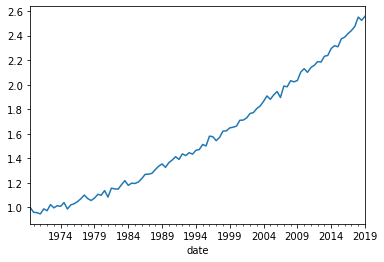

In [21]:
fig, ax = plt.subplots()
city['city_population'].plot(ax=ax)
plt.show();

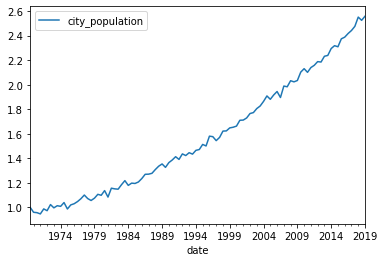

ADF Statistic: 5.297698878151177
p-value: 1.0


In [22]:
# Run the ADF test on the time series
result = adfuller(city['city_population'])

# Plot the time series
fig, ax = plt.subplots()
city.plot(ax=ax)
plt.show()

# Print the test statistic and the p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])

Take the `first difference` of city, by applying the .diff() method twice and drop the NaN values.

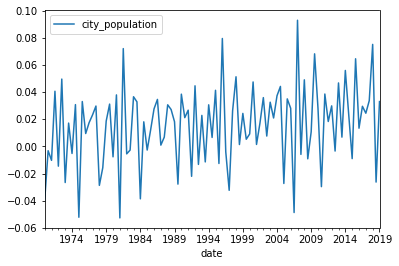

ADF Statistic: -0.8146211646182051
p-value: 0.8147894381484799


In [23]:
# Calculate the first difference of the time series
city_stationary = city.diff().dropna()

# Run ADF test on the differenced time series
result = adfuller(city_stationary['city_population'])

# Plot the differenced time series
fig, ax = plt.subplots()
city_stationary.plot(ax=ax)
plt.show()

# Print the test statistic and the p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])

Take the `second difference` of city, by applying the .diff() method twice and drop the NaN values.

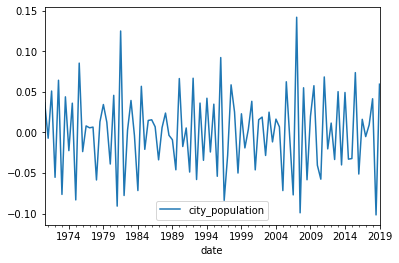

ADF Statistic: -6.433646032918747
p-value: 1.6734498510399825e-08


In [25]:
# Calculate the second difference of the time series
city_stationary = city.diff().diff().dropna()

# Run ADF test on the differenced time series
result = adfuller(city_stationary['city_population'])

# Plot the differenced time series
fig, ax = plt.subplots()
city_stationary.plot(ax=ax)
plt.show()

# Print the test statistic and the p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])

A p-value of 0.000000016 is very significant! `This time series is now stationary and ready for modeling`!

## Other tranforms

`Differencing should be the first transform you try to make a time series stationary`. But sometimes it isn't the best option.

A classic way of transforming stock time series is the `log-return of the series`. This is calculated as follows:

<img src="images/ts3_013.png" alt="" style="width: 400px;"/>

The Amazon stock time series has already been loaded for you as amazon. You can calculate the log-return of this DataFrame by substituting: 
```
yt→ amazon
yt−1→ amazon.shift(1)
log()→ np.log()
```
In this exercise you will compare the log-return transform and the first order difference of the Amazon stock time series to find which is better for making the time series stationary.

In [26]:
amazon = pd.read_csv(path+'amazon.csv', 
            index_col='date',
            parse_dates=True)
amazon.head()

,close
date,
2019-02-08,1588.22
2019-02-07,1614.37
2019-02-06,1640.26
2019-02-05,1658.81
2019-02-04,1633.31


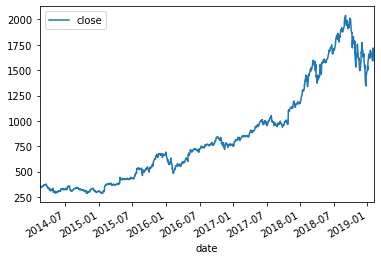

In [32]:
# Plot the differenced time series
fig, ax = plt.subplots()
amazon.plot(ax=ax)
plt.show()

In [27]:
# Calculate the first difference and drop the nans
amazon_diff = amazon.diff().dropna()

# Run test and print
result_diff = adfuller(amazon_diff['close'])
print(result_diff)

(-7.203579488811244, 2.331271725487179e-10, 23, 1234, {'1%': -3.435660336370594, '5%': -2.863885022214541, '10%': -2.568018522153254}, 10764.626718933836)


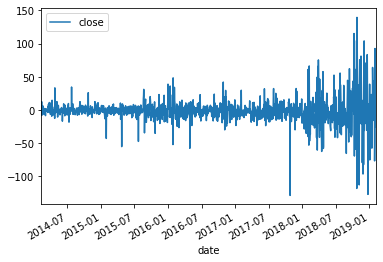

In [33]:
# Plot the differenced time series
fig, ax = plt.subplots()
amazon_diff.plot(ax=ax)
plt.show()

(-34.91574853605969, 0.0, 0, 1257, {'1%': -3.4355629707955395, '5%': -2.863842063387667, '10%': -2.567995644141416}, -6245.723147672197)


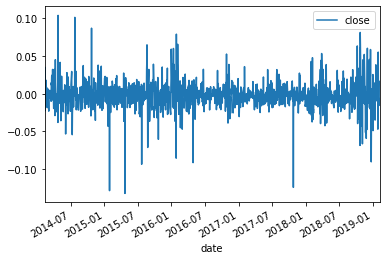

In [34]:
# Calculate log-return and drop nans
amazon_log = np.log(amazon/amazon.shift(1)).dropna()

# Run test and print
result_log = adfuller(amazon_log['close'])
print(result_log)

# Plot the differenced time series
fig, ax = plt.subplots()
amazon_log.plot(ax=ax)
plt.show()

Notice that both the differenced and the log-return transformed time series have a small p-value, but the `log transformed time series has a much more negative test statistic`. This means the log-return tranformation is better.

---
<a id='arma'></a>

## AR, MA and ARMA Models

<img src="images/ts3_014.png" alt="" style="width: 800px;"/>

<img src="images/ts3_015.png" alt="" style="width: 800px;"/>

<img src="images/ts3_016.png" alt="" style="width: 800px;"/>

<img src="images/ts3_017.png" alt="" style="width: 800px;"/>

<img src="images/ts3_018.png" alt="" style="width: 800px;"/>

<img src="images/ts3_020.png" alt="" style="width: 800px;"/>

<img src="images/ts3_019.png" alt="" style="width: 800px;"/>


## Model order

When fitting and working with AR, MA and ARMA models `it is very important to understand the model order`. You will need to pick the model order when fitting. Picking this correctly will give you a better fitting model which makes better predictions. So in this section you will practice working with model order.

In [41]:
from statsmodels.tsa.arima_process import arma_generate_sample

ar_coefs = [1, 0.4, -0.1]
ma_coefs = [1, 0.2]

y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100)

### Question 1

Print `ar_coefs` and `ma_coefs` which are available in the console. If you were to use these in the `arma_generate_sample()` function what would be the order of the data?

Possible Answers
- ARMA(2,1) correct
- ARMA(3,2)
- ARMA(1,2)
- ARMA(2,3)

### Question 2

Print `ar_coefs` and `ma_coefs` which are available in the console. If you were to use these in the `arma_generate_sample()` function what would the lag-1 AR coefficient?

Possible Answers
- 0.4
- 0.2
- -0.4 correct
- -0.2

### Question 3

Which of these models is equivalent to an AR(1) model?

Possible Answers
- ARMA(1,1)
- ARMA(1,0) correct
- MA(1)
- ARMA(0,1)

Note that setting either p or q to zero means we get a simpler model, either a AR or MA model.

In [46]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

# Function to plot signal, ACF and PACF
def plotds(xt, nlag=30, fig_size=(12, 10)):
    if not isinstance(xt, pd.Series):
         xt = pd.Series(xt)
    plt.figure(figsize=fig_size)
    layout = (2, 2)
    
    # Assign axes
    ax_xt = plt.subplot2grid(layout, (0, 0), colspan=2)
    ax_acf= plt.subplot2grid(layout, (1, 0))
    ax_pacf = plt.subplot2grid(layout, (1, 1))
    
    # Plot graphs
    xt.plot(ax=ax_xt)
    ax_xt.set_title('Time Series')
    plot_acf(xt, lags=50, ax=ax_acf)
    plot_pacf(xt, lags=50, ax=ax_pacf)
    plt.tight_layout()
    return None

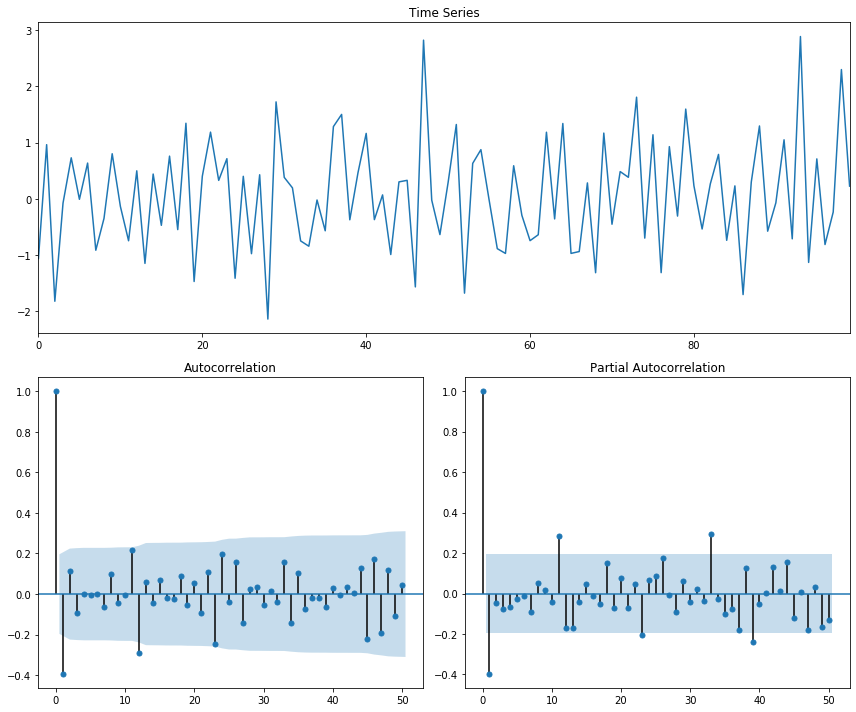

In [47]:
plotds(y)

In [ ]:
<img src="images/ts3_020.png" alt="" style="width: 800px;"/>

In [ ]:
---
<a id='intro'></a>